# Bibliotecas utilizadas no projeto

In [62]:
import json
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

# Empresas como Google, Bing e Yahoo! fornecem geocodificação como serviço (e cobram por isso). Existe uma projeto open source chamado de OpenStreetMap que mantem um serviço gratuito de geocodificação chamado Nominatim, serviço este que apresenta como limitação a quantia de uma única consuta por segundo. Vamos utilizá-lo através do pacote Python geopy para fazer a operação reversa e enriquecer o nosso DataFrame principal.


In [2]:
geolocator = Nominatim(user_agent='geocoder')
location = geolocator.reverse('-15.657014, -47.802665')
print(json.dumps(location.raw, indent=2, ensure_ascii=False))


{
  "place_id": 69565856,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 6456379935,
  "lat": "-15.656819",
  "lon": "-47.8019514",
  "display_name": "Clinica dos Olhos, Rua 7, Quadra 2, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-202, Brasil",
  "address": {
    "amenity": "Clinica dos Olhos",
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "state": "Distrito Federal",
    "ISO3166-2-lvl4": "BR-DF",
    "region": "Região Centro-Oeste",
    "postcod

# Vamos então aplicar a geocodificação nas coordenadas das três regiões e extrair informações de cidade e bairro.


geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# Baixando diretamente na WEB o arquivor deliveries.json que iremos utilizar no Projeto

In [3]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveres.json

In [4]:
deliver_df = pd.read_json('deliveres.json')

In [5]:
deliver_df

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."
...,...,...,...,...,...
194,cvrp-1-df-59,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'fc800db1942651f8195f870c5930ca26', 'p..."
195,cvrp-0-df-87,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '3d50e820e1c16621e1fa19f1a7df0c56', 'p..."
196,cvrp-1-df-83,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'e6cffd090ce2a7bd0e0292f1ed9acd3', 'po..."
197,cvrp-2-df-7,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '51b1354b02a20d919b83bb664ea4d845', 'p..."


In [6]:
origin_df = pd.json_normalize(deliver_df['origin'])
origin_df

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145
...,...,...
194,-47.893662,-15.805118
195,-47.802665,-15.657014
196,-47.893662,-15.805118
197,-48.054989,-15.838145


In [7]:
deliver_df = pd.concat([deliver_df,origin_df], axis=1)
deliver_df = deliver_df.drop(columns='origin')
deliver_df = deliver_df.rename(columns={'lat':'hub_lat', 'lng':'hub_lng'})

In [8]:
deliver_df

,name,region,vehicle_capacity,deliveries,hub_lng,hub_lat
0,cvrp-2-df-33,df-2,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145
...,...,...,...,...,...,...
194,cvrp-1-df-59,df-1,180,"[{'id': 'fc800db1942651f8195f870c5930ca26', 'p...",-47.893662,-15.805118
195,cvrp-0-df-87,df-0,180,"[{'id': '3d50e820e1c16621e1fa19f1a7df0c56', 'p...",-47.802665,-15.657014
196,cvrp-1-df-83,df-1,180,"[{'id': 'e6cffd090ce2a7bd0e0292f1ed9acd3', 'po...",-47.893662,-15.805118
197,cvrp-2-df-7,df-2,180,"[{'id': '51b1354b02a20d919b83bb664ea4d845', 'p...",-48.054989,-15.838145


In [9]:
deliver_explode_df = deliver_df[['deliveries']].explode('deliveries')
deliver_explode_df

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."
...,...
198,"{'id': '21693bf442ac5890adbdf2648c12881a', 'po..."
198,"{'id': '7aaa35088b37b6e542c4cd69663a7ebf', 'po..."
198,"{'id': '60c00d5390da4f28167439cd9c566703', 'po..."
198,"{'id': '51f456963785e7381243ff7baf7efd06', 'po..."


In [10]:
deliveries_normalized_df = pd.concat([
pd.DataFrame(deliver_explode_df["deliveries"].apply(
lambda record: record["size"])
).rename(columns={"deliveries": "delivery_size"}),
pd.DataFrame(deliver_explode_df["deliveries"].apply(
lambda record: record["point"]["lng"])
).rename(columns={"deliveries": "delivery_lng"}),
pd.DataFrame(deliver_explode_df["deliveries"].apply(
lambda record: record["point"]["lat"])
).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)
deliveries_normalized_df

,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055
...,...,...,...
198,8,-48.064269,-15.997694
198,4,-48.065176,-16.003597
198,9,-48.065841,-16.003808
198,1,-48.062327,-16.001568


In [11]:
deliver_df = deliver_df.drop(columns='deliveries')
deliver_df

,name,region,vehicle_capacity,hub_lng,hub_lat
0,cvrp-2-df-33,df-2,180,-48.054989,-15.838145
1,cvrp-2-df-73,df-2,180,-48.054989,-15.838145
2,cvrp-2-df-20,df-2,180,-48.054989,-15.838145
3,cvrp-1-df-71,df-1,180,-47.893662,-15.805118
4,cvrp-2-df-87,df-2,180,-48.054989,-15.838145
...,...,...,...,...,...
194,cvrp-1-df-59,df-1,180,-47.893662,-15.805118
195,cvrp-0-df-87,df-0,180,-47.802665,-15.657014
196,cvrp-1-df-83,df-1,180,-47.893662,-15.805118
197,cvrp-2-df-7,df-2,180,-48.054989,-15.838145


In [12]:
deliver_df = pd.concat([deliver_df,deliveries_normalized_df], axis=1)
deliver_df

,name,region,vehicle_capacity,hub_lng,hub_lat,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,180,-48.054989,-15.838145,9,-48.116189,-15.848929
0,cvrp-2-df-33,df-2,180,-48.054989,-15.838145,2,-48.118195,-15.850772
0,cvrp-2-df-33,df-2,180,-48.054989,-15.838145,1,-48.112483,-15.847871
0,cvrp-2-df-33,df-2,180,-48.054989,-15.838145,2,-48.118023,-15.846471
0,cvrp-2-df-33,df-2,180,-48.054989,-15.838145,7,-48.114898,-15.858055
...,...,...,...,...,...,...,...,...
198,cvrp-2-df-62,df-2,180,-48.054989,-15.838145,8,-48.064269,-15.997694
198,cvrp-2-df-62,df-2,180,-48.054989,-15.838145,4,-48.065176,-16.003597
198,cvrp-2-df-62,df-2,180,-48.054989,-15.838145,9,-48.065841,-16.003808
198,cvrp-2-df-62,df-2,180,-48.054989,-15.838145,1,-48.062327,-16.001568


In [13]:
deliver_df[['name', 'region']].describe().round(2).transpose()

,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708


In [14]:
deliver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636149 entries, 0 to 198
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   vehicle_capacity  636149 non-null  int64  
 3   hub_lng           636149 non-null  float64
 4   hub_lat           636149 non-null  float64
 5   delivery_size     636149 non-null  int64  
 6   delivery_lng      636149 non-null  float64
 7   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 43.7+ MB


In [15]:
deliver_df[['vehicle_capacity','delivery_size']].describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.00,0.00,180.0,180.0,180.0,180.0,180.0
delivery_size,636149.0,5.51,2.87,1.0,3.0,6.0,8.0,10.0


## Processamos o dado bruto e construímos o DataFrame Pandas deliveries_df através de operações como achatamento (flatten) e explosão (explode) de colunas.


#     Geocodificação reversa do hub

### A geocodificação é o processo que transforma uma localização descrita por um texto (endereço, nome do local, etc.) em sua respectiva coodernada geográfica (latitude e longitude). A geocodificação reversa faz o oposto, transforma uma coordenada geográfica de um local em suas respectivas descrições textuais.


In [16]:
hub_df = deliver_df[['region', 'hub_lng', 'hub_lat']]
hub_df = hub_df.drop_duplicates().sort_values('region')
hub_df = hub_df.reset_index()
hub_df = hub_df.drop(columns='index')
hub_df

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


In [17]:

hub_df['coordinates'] = hub_df['hub_lat'].astype(str) + "," + hub_df['hub_lng'].astype(str)
hub_df['geodata'] = hub_df['coordinates'].apply(geocoder)
hub_df

,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248,-47.802664728268745","(Clinica dos Olhos, Rua 7, Quadra 2, Sobradinh..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334,-47.89366206897872","(Bloco B / F, SQS 303, Asa Sul, Brasília, Plan..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274,-48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


### O DataFrame hub_geodata_df com as informações de cidade e bairro é então combinado ao DataFrame principal deliveries_df, enriquecendo assim o dado.


In [18]:
hub_geodata_df = pd.json_normalize(hub_df['geodata'].apply(lambda data:data.raw))
hub_geodata_df

,place_id,licence,osm_type,osm_id,lat,lon,display_name,boundingbox,address.amenity,address.road,...,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.building,address.neighbourhood,address.city,address.shop,address.house_number
0,69565856,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6456379935,-15.656819,-47.8019514,"Clinica dos Olhos, Rua 7, Quadra 2, Sobradinho...","[-15.656869, -15.656769, -47.8020014, -47.8019...",Clinica dos Olhos,Rua 7,...,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN,NaN
1,133642029,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,140908717,-15.80443735,-47.893155456691616,"Bloco B / F, SQS 303, Asa Sul, Brasília, Plano...","[-15.805071, -15.8038038, -47.8937468, -47.892...",NaN,SQS 303,...,BR-DF,Região Centro-Oeste,70330-400,Brasil,br,Bloco B / F,SQS 303,Brasília,NaN,NaN
2,67637389,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,"Armazém do Bolo, lote 4/8, CSB 4/5, Taguatinga...","[-15.8384871, -15.8383871, -48.0553417, -48.05...",NaN,CSB 4/5,...,BR-DF,Região Centro-Oeste,72015030,Brasil,br,NaN,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [19]:
hub_geodata_df = hub_geodata_df[["address.town", "address.suburb", "address.city"]]

hub_geodata_df.rename(columns={"address.town": "hub_town","address.suburb": "hub_suburb","address.city": "hub_city"
}, inplace=True)

hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(),hub_geodata_df["hub_city"],
hub_geodata_df["hub_town"])

hub_geodata_df["hub_suburb"] = np.where(
hub_geodata_df["hub_suburb"].notna(),hub_geodata_df["hub_suburb"],hub_geodata_df["hub_city"])

hub_geodata_df = hub_geodata_df.drop("hub_town", axis=1)
hub_geodata_df.head()

/home/alexandre/.local/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/tmp/ipykernel_11030/4154930288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(),hub_geodata_df["hub_city"],
/tmp/ipykernel_11030/4154930288.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


In [20]:
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[["region", "hub_suburb", "hub_city"]]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


In [21]:
deliver_df = deliver_df.merge(hub_df, on='region')
deliver_df = deliver_df[["name","region","hub_lng","hub_lat","hub_city","hub_suburb","vehicle_capacity",
"delivery_size",
"delivery_lng",
"delivery_lat"
]]

deliver_df

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055
...,...,...,...,...,...,...,...,...,...,...
636144,cvrp-0-df-87,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,2,-47.790652,-15.648593
636145,cvrp-0-df-87,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,5,-47.788278,-15.644174
636146,cvrp-0-df-87,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.791276,-15.652118
636147,cvrp-0-df-87,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.790425,-15.646404


# Baixando direto da WEB o arquivo deliveries-geodata.csv

In [22]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv 

# Criando um Dataframe do arquivo deliveries-geodata.csv

In [23]:
deliveries_geodata_df = pd.read_csv('deliveries-geodata.csv')
deliveries_geodata_df

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol
...,...,...,...,...
636144,-48.064269,-15.997694,Gama,Setor Oeste
636145,-48.065176,-16.003597,Gama,Setor Oeste
636146,-48.065841,-16.003808,Gama,Setor Oeste
636147,-48.062327,-16.001568,Gama,Setor de Indústrias - Industrial


# Fazendo um merge com o Dataframe principal do projeto com o deliveries_geodata_df

In [24]:
deliver_df = deliver_df.merge(deliveries_geodata_df[['delivery_city', 'delivery_suburb']], left_index=True, right_index=True)
deliver_df

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol
...,...,...,...,...,...,...,...,...,...,...,...,...
636144,cvrp-0-df-87,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,2,-47.790652,-15.648593,Gama,Setor Oeste
636145,cvrp-0-df-87,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,5,-47.788278,-15.644174,Gama,Setor Oeste
636146,cvrp-0-df-87,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.791276,-15.652118,Gama,Setor Oeste
636147,cvrp-0-df-87,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.790425,-15.646404,Gama,Setor de Indústrias - Industrial


# Alterando os valores nulos para indefinidos

In [25]:
deliver_df = deliver_df.fillna('Indefinido')
deliver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   hub_city          636149 non-null  object 
 5   hub_suburb        636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     636149 non-null  object 
 11  delivery_suburb   636149 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 79.2+ MB


In [26]:
deliver_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
hub_city            False
hub_suburb          False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
delivery_city       False
delivery_suburb     False
dtype: bool

# Mapa de entregas por região¶

### Vamos utilizar o pacote Python GeopPandas (link da documentação) para visualizar as coordenadas dos hubs e das entregas no mapa do Distrito Federal, segmentados pela região dos hubs. O pacote adiciona funcionalidades geoespaciais ao pacote Python Pandas.

### Vamos fazer o download dos dados do mapa do Distrito Federal do site oficial do IBGE através do seguinte link para criar o DataFrame mapa. Note a coluna geometry.



!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

# Transformando o arquivo distrito-federal.shp em um Dataframe e juntando com o Dataframe principal

In [28]:
mapa = geopandas.read_file('distrito-federal.shp')
mapa = mapa.loc[[0]]
mapa

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


In [43]:
hub_df = deliver_df[['region', 'hub_lng', 'hub_lat']].drop_duplicates().reset_index(drop=True)
geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df['hub_lng'], hub_df['hub_lat']))
geo_hub_df

,region,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


In [44]:
geo_deliveries_df = geopandas.GeoDataFrame(deliver_df, geometry=geopandas.points_from_xy(deliver_df["delivery_lng"], deliver_df["delivery_lat"]))
geo_deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)


# Gerando um Dataframe separando as regiões do DF em 3 e motrando os locais com mais e menos entregas

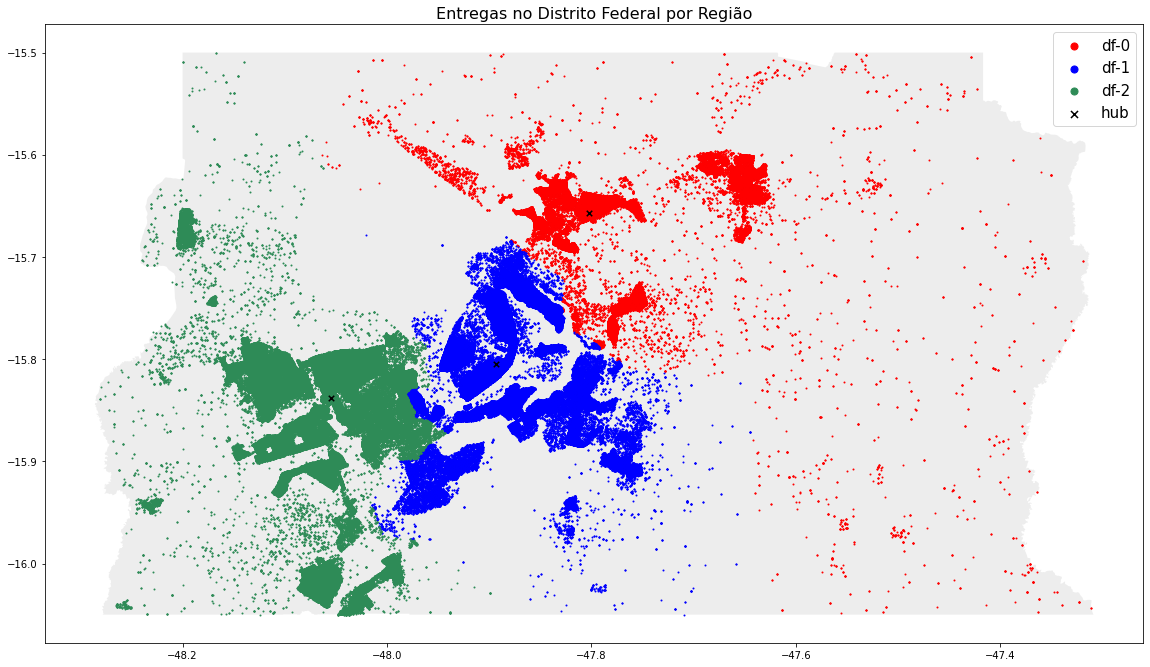

In [49]:
fig, ax = plt.subplots(figsize=(50/2.54, 50/2.54))

mapa.plot(ax=ax, alpha=0.4, color= 'lightgrey')
geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color='red', label='df-0')
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color = 'blue', label='df-1')
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color = 'seagreen', label= 'df-2')


# plot dos hubs
geo_hub_df.plot(ax=ax, markersize=30, marker="x", color="black", label="hub")

# plot da legenda
plt.title("Entregas no Distrito Federal por Região", fontdict={"fontsize": 16})
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

# Calculando a porcentagem de entregas por região e gerando um Gráfico

In [64]:
data = deliver_df[['region','vehicle_capacity']].value_counts(normalize=True).reset_index()
data = data.rename(columns={0:'region_percent'})
data['region_percent'] = (data['region_percent'] * 100).round(2)
data

,region,vehicle_capacity,region_percent
0,df-1,180,47.90
1,df-2,180,41.08
2,df-0,180,11.02


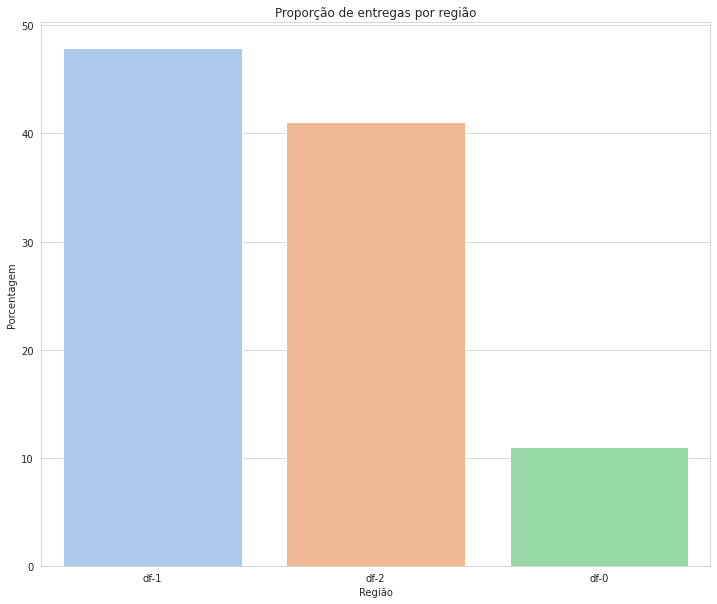

In [71]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12,10))
    grafico = sns.barplot(data=data, x="region", y="region_percent", ci=None, palette="pastel")
    grafico.set(title='Proporção de entregas por região', xlabel='Região', ylabel='Porcentagem')